
## Programming for Data Science

### Lecture 11: Data Manipulation with Pandas DataFrame

### Instructor: Farhad Pourkamali 


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/farhad-pourkamali/ProgrammingForDataScience/blob/main/Lecture11_PandasDataFrame.ipynb)


### Introduction
<hr style="border:2px solid gray">

* A Pandas `DataFrame` is built on top of NumPy arrays, providing a more flexible and **labeled** interface for working with structured data.

| Name    | Age | City     |
|---------|-----|----------|
| Alice   | 25  | New York |
| Bob     | 30  | Paris    |
| Charlie | 35  | London   |


* Each column in a `DataFrame` can be considered as a 1-dimensional NumPy array, and the entire DataFrame is essentially a collection of these arrays.

* Each column in a `DataFrame` has a unique name, which allows for easy identification and access.
    
* Rows in a `DataFrame` are also labeled, and each row has a unique index.

* You can create a `DataFrame` from a NumPy array using the `pd.DataFrame()` constructor from the Pandas library.

In [1]:
import pandas as pd
import numpy as np

# Creating a NumPy array with student exam scores
data = np.array([
    [85, 90, 78, 92],
    [92, 88, 95, 75],
    [78, 85, 88, 100]
])

# Creating a DataFrame with column names and student IDs as label index
df = pd.DataFrame(data, columns=['Math', 'English', 'Science', 'Programming'], 
                  index=['Student1', 'Student2', 'Student3'])

df


,Math,English,Science,Programming
Student1,85,90,78,92
Student2,92,88,95,75
Student3,78,85,88,100


* Accessing Data in `DataFrame`:

    * Accessing a column: `df['ColumnName']` or `df.ColumnName`
    * Accessing a row by label index: `df.loc['LabelIndex']`

In [2]:
# All Math scores

df["Math"]

Student1    85
Student2    92
Student3    78
Name: Math, dtype: int64

In [3]:
# All Math and English scores 

df[["Math", "English"]]

,Math,English
Student1,85,90
Student2,92,88
Student3,78,85


In [4]:
# Accessing information for 'Student2'

df.loc['Student2']

Math           92
English        88
Science        95
Programming    75
Name: Student2, dtype: int64

* We can add a new column to the Pandas DataFrame to calculate the total score for each student.

    * The right side of the assignment calculates the sum along the horizontal axis (`axis=1`) for each row. 

In [5]:
df['Total'] = df.sum(axis=1)

df

,Math,English,Science,Programming,Total
Student1,85,90,78,92,345
Student2,92,88,95,75,350
Student3,78,85,88,100,351


* We can sort the Pandas DataFrame based on the values in the `Total` column in descending order.

In [6]:
df.sort_values(by='Total', ascending=False)


,Math,English,Science,Programming,Total
Student3,78,85,88,100,351
Student2,92,88,95,75,350
Student1,85,90,78,92,345


In [7]:
df

,Math,English,Science,Programming,Total
Student1,85,90,78,92,345
Student2,92,88,95,75,350
Student3,78,85,88,100,351


* Syntax

```
DataFrame.sort_values(by, axis=0, ascending=True, inplace=False)

```

* Parameters

    * `by`: This is the key parameter that specifies the column or list of columns by which the DataFrame should be sorted. It can be a single column name or a list of column names.

    * `axis`: This parameter specifies whether the sorting should be done along rows (axis=0, the default) or columns (axis=1). 

    * `ascending`: If set to True (default), the sorting is done in ascending order. If set to False, the sorting is done in descending order.

    * `inplace`: If set to True, the sorting is done in place, and the original DataFrame is modified. If set to False (default), a new DataFrame with sorted values is returned, and the original DataFrame remains unchanged.

* `Filtering` a DataFrame in Pandas involves creating a boolean condition and using it to select rows that satisfy that condition.

In [8]:
df

,Math,English,Science,Programming,Total
Student1,85,90,78,92,345
Student2,92,88,95,75,350
Student3,78,85,88,100,351


In [9]:
# Filtering DataFrame for students with 'Math' score greater than 90
df['Math'] > 90


Student1    False
Student2     True
Student3    False
Name: Math, dtype: bool

In [10]:
df[df['Math'] > 90]

,Math,English,Science,Programming,Total
Student2,92,88,95,75,350


* `df.plot(kind='...')` is the basic syntax for creating plots from a Pandas DataFrame.
* The `kind` parameter specifies the type of plot to generate.

    * kind='line': Line plot (default if not specified).
    * kind='bar': Vertical bar plot.
    * kind='barh': Horizontal bar plot.
    * kind='scatter': Scatter plot.
    * kind='hist': Histogram.

<Axes: title={'center': 'Student Scores'}>

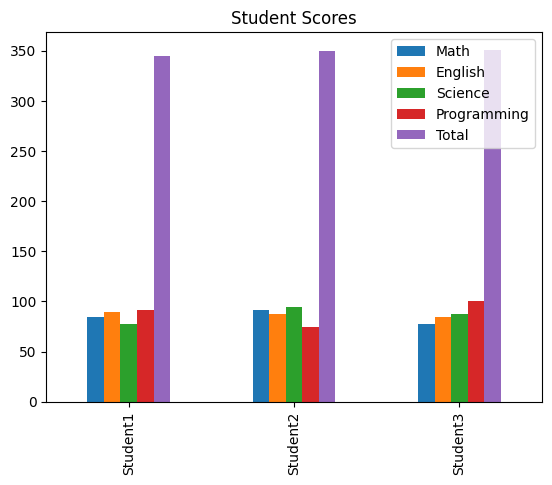

In [11]:
df.plot(kind='bar', title='Student Scores')

<Axes: title={'center': 'Scatter Plot'}, xlabel='Math', ylabel='Science'>

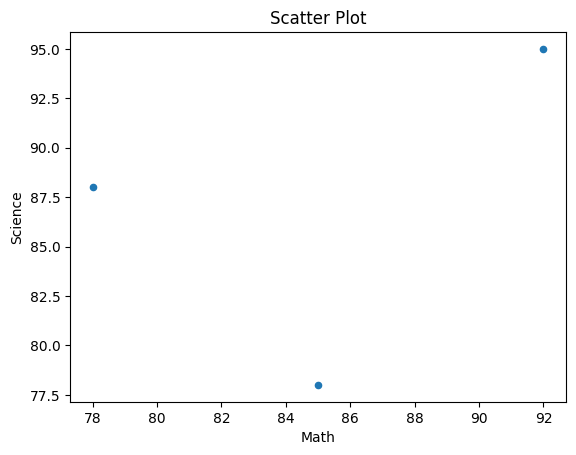

In [12]:
df.plot(kind='scatter', x='Math', y='Science', title='Scatter Plot')

### Missing data

* Handling missing data in a Pandas DataFrame involves identifying, analyzing, and dealing with `NaN` (Not a Number) or null values. 

* Identifying Missing Values:

    * Use `df.isnull()` or `df.isna()` to identify missing values.
    * `df.isnull().sum()` provides the count of missing values in each column.

In [13]:
import pandas as pd
import numpy as np

# Creating a DataFrame with missing values
data = {'A': [1, 2, np.nan, 4],
        'B': [5, np.nan, 7, 8],
        'C': [9, 10, 11, 12]}

df = pd.DataFrame(data)

df

,A,B,C
0,1.0,5.0,9
1,2.0,NaN,10
2,NaN,7.0,11
3,4.0,8.0,12


In [14]:
df.isnull()

,A,B,C
0,False,False,False
1,False,True,False
2,True,False,False
3,False,False,False


In [15]:
df.isna()

,A,B,C
0,False,False,False
1,False,True,False
2,True,False,False
3,False,False,False


In [16]:
df.isnull().sum()

A    1
B    1
C    0
dtype: int64

* Dropping Missing Values:

    * Use `df.dropna()` to remove rows with missing values.
    * `df.dropna(axis=1)` removes columns with missing values.

In [17]:
df

,A,B,C
0,1.0,5.0,9
1,2.0,NaN,10
2,NaN,7.0,11
3,4.0,8.0,12


In [18]:
df.dropna()

,A,B,C
0,1.0,5.0,9
3,4.0,8.0,12


In [19]:
df.dropna(axis=1)

,C
0,9
1,10
2,11
3,12


In [20]:
df

,A,B,C
0,1.0,5.0,9
1,2.0,NaN,10
2,NaN,7.0,11
3,4.0,8.0,12


* Filling Missing Values:

    * Use `df.fillna(value)` to fill missing values with a specific value.
    * `df.fillna(df.mean())` fills missing values with the mean of each column.

In [21]:
df.fillna(4)

,A,B,C
0,1.0,5.0,9
1,2.0,4.0,10
2,4.0,7.0,11
3,4.0,8.0,12


In [22]:
df

,A,B,C
0,1.0,5.0,9
1,2.0,NaN,10
2,NaN,7.0,11
3,4.0,8.0,12


In [23]:
df.fillna(df.mean())

,A,B,C
0,1.000000,5.000000,9
1,2.000000,6.666667,10
2,2.333333,7.000000,11
3,4.000000,8.000000,12


### GroupBy in Pandas DataFrame

* The `groupby` function in Pandas is used for grouping rows based on some criteria and then applying a function to each group independently. 

* `df.groupby(by)` is the basic syntax for grouping a DataFrame by a specific column or a combination of columns.

* After grouping, you can apply `aggregation functions` (e.g., sum, mean, count) to compute summary statistics for each group.


In [24]:
import pandas as pd

data = {'Student': ['Alice', 'Bob', 'Charlie', 'Alice', 'Bob'],
        'Class': ['A', 'B', 'A', 'B', 'A'],
        'Score': [85, 92, 78, 90, 88]}

df = pd.DataFrame(data)

df

,Student,Class,Score
0,Alice,A,85
1,Bob,B,92
2,Charlie,A,78
3,Alice,B,90
4,Bob,A,88


In [25]:
# Grouping by 'Student' and calculating the mean score

grouped_df = df[["Student", "Score"]].groupby(by='Student').mean()

grouped_df

,Score
Student,
Alice,87.5
Bob,90.0
Charlie,78.0


### Combining DataFrames

* In Pandas, the `concat` function is used to concatenate, or combine, two or more DataFrames along a particular axis. 
* Syntax 
```
pd.concat(objs, axis=0)
```
* `objs`: This is a sequence (list or dictionary) of DataFrames that you want to concatenate.

* `axis`: Specifies the axis along which the concatenation will occur. `axis=0` concatenates along rows (vertically), and `axis=1` concatenates along columns (horizontally).



In [26]:
import pandas as pd

# Sample DataFrames
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                    'B': ['B0', 'B1', 'B2'],
                    'C': ['C0', 'C1', 'C2']})

df2 = pd.DataFrame({'A': ['A3', 'A4', 'A5'],
                    'B': ['B3', 'B4', 'B5'],
                    'C': ['C3', 'C4', 'C5']})

In [27]:
df1

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [28]:
df2

,A,B,C
0,A3,B3,C3
1,A4,B4,C4
2,A5,B5,C5


In [29]:
# Concatenating along rows (vertically)

pd.concat([df1, df2], axis=0)



,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2
0,A3,B3,C3
1,A4,B4,C4
2,A5,B5,C5


In [30]:
# Resetting the index 

pd.concat([df1, df2], axis=0).reset_index(drop=True)

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2
3,A3,B3,C3
4,A4,B4,C4
5,A5,B5,C5


In [31]:
# Setting a custom index

pd.concat([df1, df2], axis=0).set_index(pd.Index(['N0', 'N1', 'N2', 'N3', 'N4', 'N5']))

,A,B,C
N0,A0,B0,C0
N1,A1,B1,C1
N2,A2,B2,C2
N3,A3,B3,C3
N4,A4,B4,C4
N5,A5,B5,C5


### Import data from CSV files

* In Pandas, you can use the `pd.read_csv()` function to import data from a CSV (Comma-Separated Values) file and create a DataFrame. 

In [32]:
import pandas as pd

# Reading data from a CSV file into a DataFrame
df = pd.read_csv('life_satisfaction.csv', index_col=0)

# Displaying the DataFrame
df

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6
5,Portugal,32181.154537,5.4
6,Poland,32238.157259,6.1
7,Estonia,35638.421351,5.7
8,Spain,36215.447591,6.3
9,Slovenia,36547.738956,5.9


In [33]:
df.shape

(27, 3)

* The `index_col` parameter in the `pd.read_csv()` function is used to specify which column from the CSV file should be used as the index for the resulting Pandas DataFrame. The index is essentially the "row labels" of the DataFrame.

* The `describe()` method provides a quick overview of the basic statistics for each numerical column in the DataFrame.

In [34]:
df.describe()

,GDP per capita (USD),Life satisfaction
count,27.000000,27.000000
mean,41564.521771,6.566667
std,9631.452319,0.765607
min,26456.387938,5.400000
25%,33938.289305,5.900000
50%,41627.129269,6.800000
75%,49690.580269,7.300000
max,60235.728492,7.600000


* The `info()` method provides a concise summary of the DataFrame, including data types, non-null counts, and memory usage.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               27 non-null     object 
 1   GDP per capita (USD)  27 non-null     float64
 2   Life satisfaction     27 non-null     float64
dtypes: float64(2), object(1)
memory usage: 864.0+ bytes


In [36]:
# Filtering 

df[df["GDP per capita (USD)"] > 40000]

,Country,GDP per capita (USD),Life satisfaction
13,United Kingdom,41627.129269,6.8
14,France,42025.617373,6.5
15,New Zealand,42404.393738,7.3
16,Canada,45856.625626,7.4
17,Finland,47260.800458,7.6
18,Belgium,48210.033111,6.9
19,Australia,48697.837028,7.3
20,Sweden,50683.323510,7.3
21,Germany,50922.358023,7.0
22,Austria,51935.603862,7.1


* In Pandas, the `to_numpy()` method is used to convert a DataFrame into a NumPy array. This method returns a NumPy array representation of the DataFrame data.

In [37]:
my_arr = df[["GDP per capita (USD)", "Life satisfaction"]].to_numpy()

my_arr.shape

(27, 2)

In [38]:
type(my_arr)

numpy.ndarray

In [39]:
my_arr

array([[2.64563879e+04, 5.80000000e+00],
       [2.72870834e+04, 5.40000000e+00],
       [2.83849878e+04, 5.50000000e+00],
       [2.99324939e+04, 5.90000000e+00],
       [3.10077684e+04, 5.60000000e+00],
       [3.21811545e+04, 5.40000000e+00],
       [3.22381573e+04, 6.10000000e+00],
       [3.56384214e+04, 5.70000000e+00],
       [3.62154476e+04, 6.30000000e+00],
       [3.65477390e+04, 5.90000000e+00],
       [3.67320347e+04, 5.90000000e+00],
       [3.83413076e+04, 7.20000000e+00],
       [3.89921484e+04, 6.00000000e+00],
       [4.16271293e+04, 6.80000000e+00],
       [4.20256174e+04, 6.50000000e+00],
       [4.24043937e+04, 7.30000000e+00],
       [4.58566256e+04, 7.40000000e+00],
       [4.72608005e+04, 7.60000000e+00],
       [4.82100331e+04, 6.90000000e+00],
       [4.86978370e+04, 7.30000000e+00],
       [5.06833235e+04, 7.30000000e+00],
       [5.09223580e+04, 7.00000000e+00],
       [5.19356039e+04, 7.10000000e+00],
       [5.22797289e+04, 7.50000000e+00],
       [5.420956

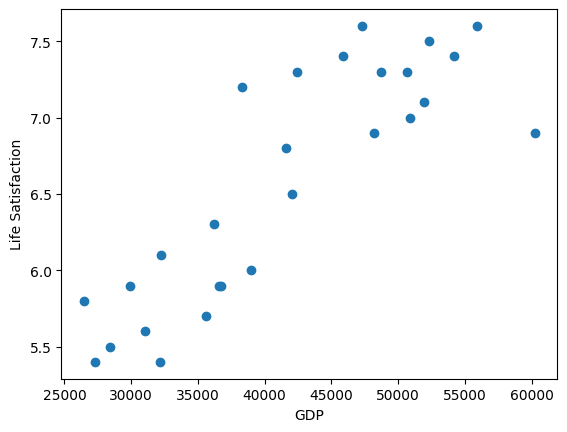

In [40]:
import matplotlib.pyplot as plt 

plt.scatter(my_arr[:,0], my_arr[:,1])
plt.xlabel("GDP")
plt.ylabel("Life Satisfaction")
plt.show()

### HW 11

In this homework assignment, we work with the `iris.csv` file. 

1. Load the Iris dataset into a Pandas DataFrame and perform the following tasks:

* Display the first 5 rows of the dataset.
* Print the summary statistics of the dataset.
* Count the number of samples for each iris species in the dataset. You can use the `value_counts()` method or other NumPy methods for counting the number of samples.

2. Using the Iris dataset, create the following visualizations using Matplotlib:

* A scatter plot of sepal length vs. sepal width colored by species.
* A histogram of petal lengths for all species combined, and then separately for each species.

3. Perform the following operations on the Iris dataset:

* Select and display rows where the petal length is greater than 1.5 cm.
* Sort the dataset by sepal width in descending order and display the first 10 rows.

4. Add new columns to the DataFrame based on existing data:

* Add a column named `sepal_area` by multiplying sepal length and sepal width.
* Add a column named `petal_area` by multiplying petal length and petal width.
* Create a new column `size_category` that categorizes flowers into 'Small' and 'Large' based on sepal_area; use the median as the threshold.